# PyFolio Portfolio Analysis

In [24]:
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical

## Set A Benchmark Algo for SPY

In [ ]:
def initialize(context):
    context.spy = sid(8554)

    
    set_max_leverage(1.01)
    
    schedule_function(rebalance,date_rules.every_day(),time_rules.market_open())
    
def rebalance(context,data):
    order_target_percent(context.spy,1)

In [41]:
# Get benchmark returns
benchmark_rets = get_backtest('5986c511c94d014fc81acf7b')

100% Time: 0:00:00|###########################################################|


In [42]:
bm_returns = benchmark_rets.daily_performance['returns']
bm_positions = benchmark_rets.pyfolio_positions
bm_transactions = benchmark_rets.pyfolio_transactions

### Use Algo from Leverage Lecture

In [43]:
# Use same algo as in the Leverage Lecture!
bt = get_backtest('5986b969dbab994fa4264696')

100% Time: 0:00:00|###########################################################|


In [44]:
bt_returns = bt.daily_performance['returns']
bt_positions = bt.pyfolio_positions
bt_transactions = bt.pyfolio_transactions

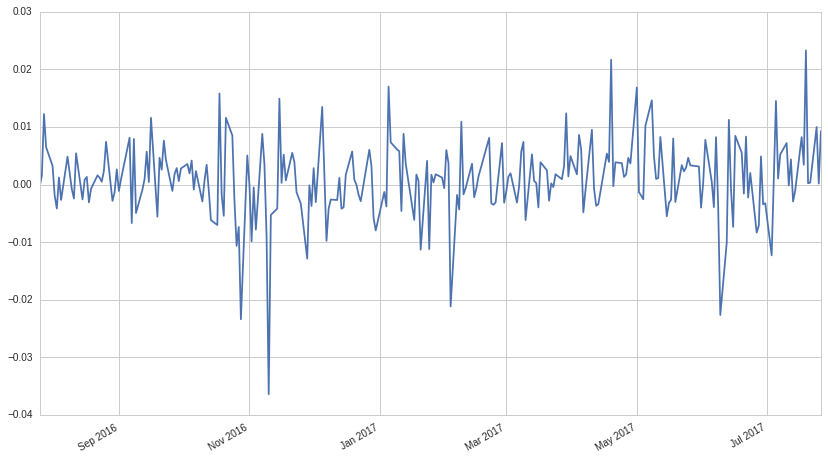

In [45]:
bt_returns.plot()

In [46]:
empyrical.beta(bt_returns,bm_returns)

0.14608838992380041

# PyFolio Plots

In [47]:
benchmark_rets = bm_returns

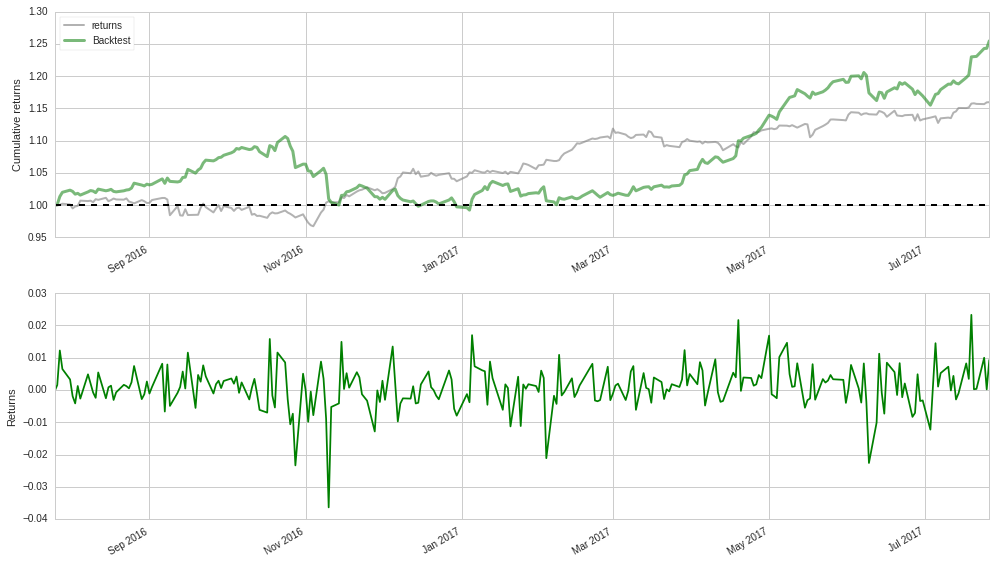

In [48]:
# Cumulative Returns
plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns, benchmark_rets)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()

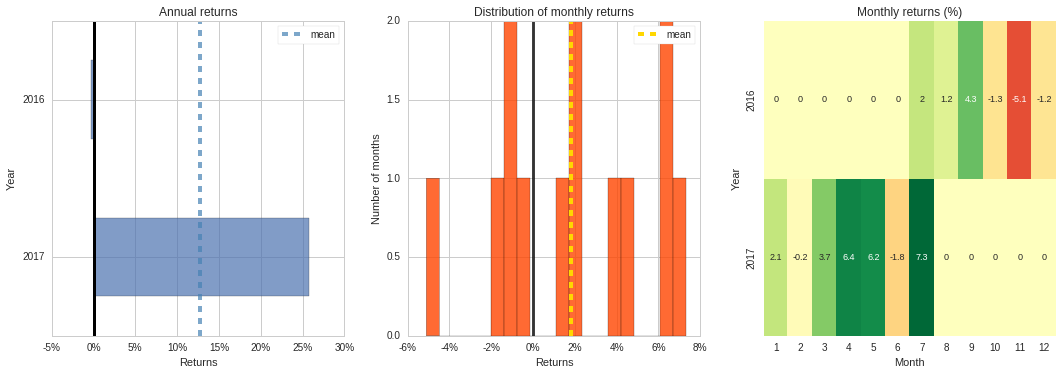

In [49]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(15,5)

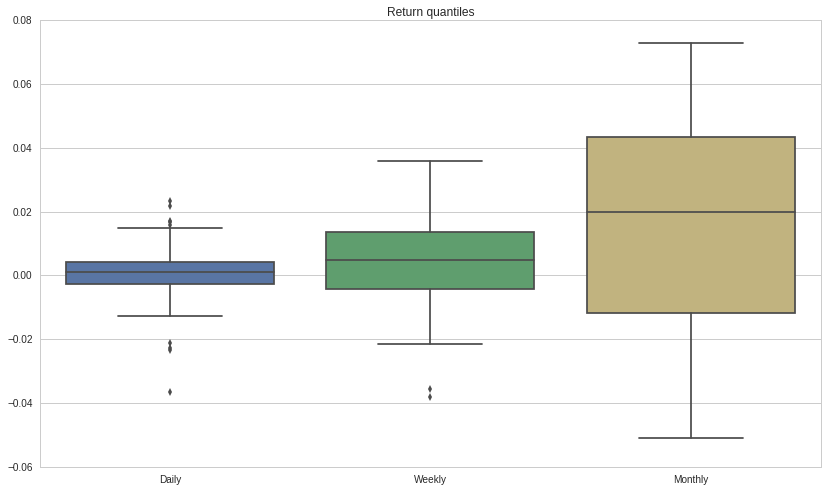

In [50]:
pf.plot_return_quantiles(bt_returns);

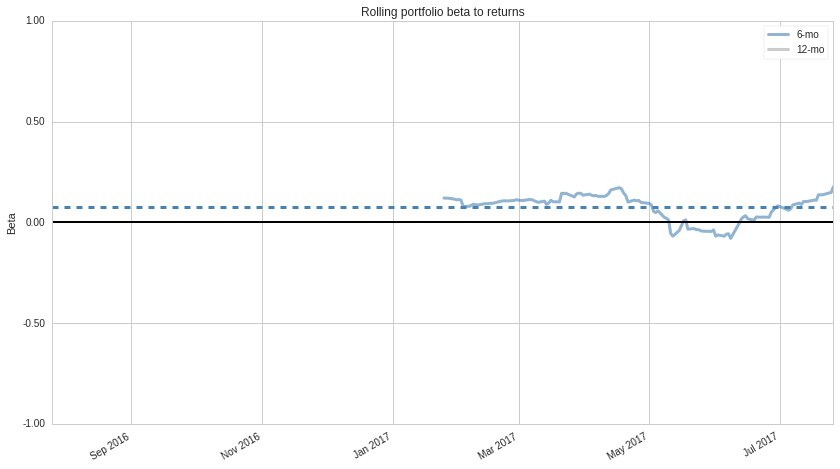

In [51]:
pf.plot_rolling_beta(bt_returns, benchmark_rets);


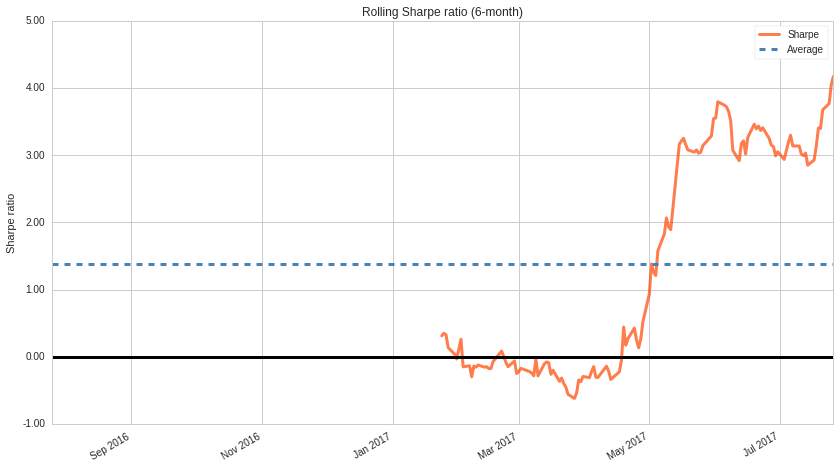

In [52]:
pf.plot_rolling_sharpe(bt_returns);

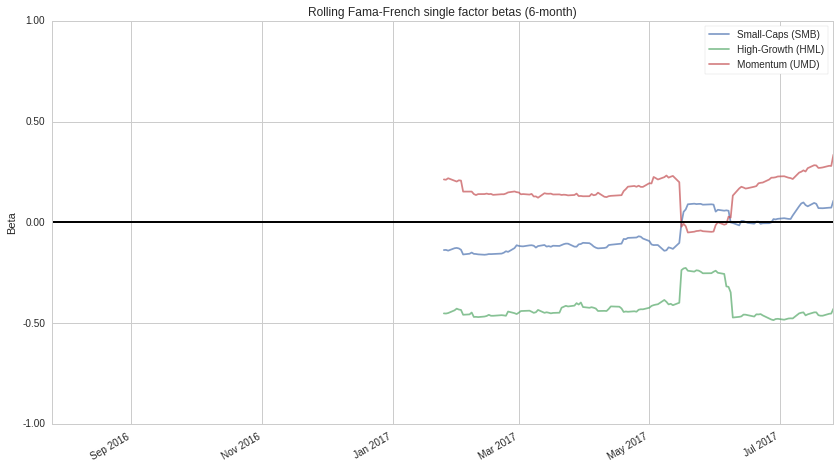

In [53]:
pf.plot_rolling_fama_french(bt_returns);

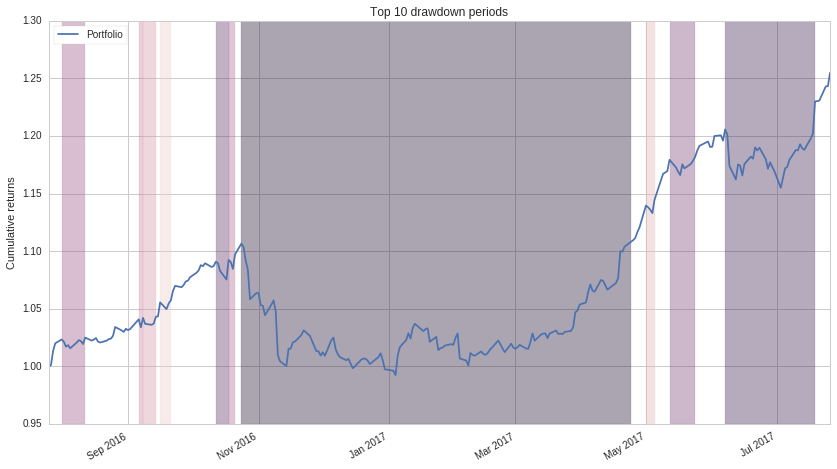

In [54]:
pf.plot_drawdown_periods(bt_returns);

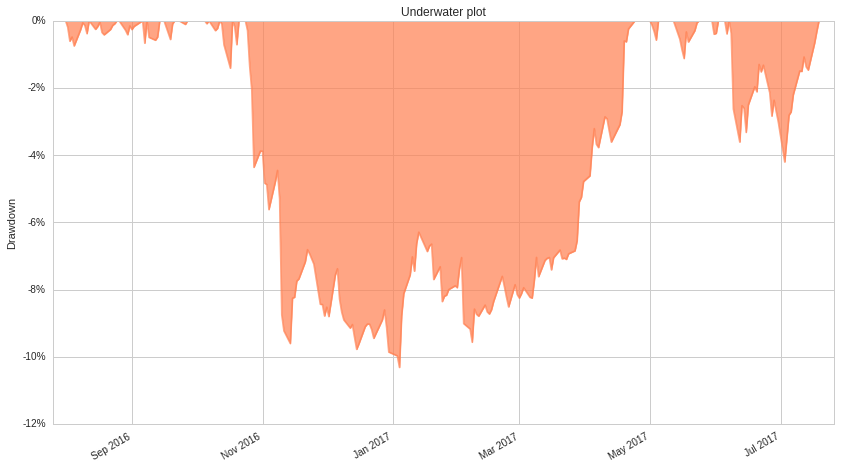

In [55]:
pf.plot_drawdown_underwater(bt_returns);

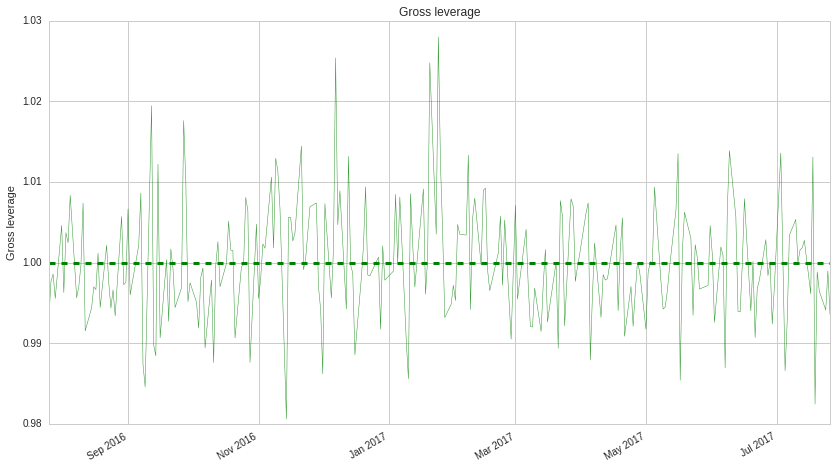

In [56]:
pf.plot_gross_leverage(bt_returns, bt_positions);

Top 10 long positions of all time,max
AMZN-16841,50.93%


Top 10 short positions of all time,max
IBM-3766,-52.03%


Top 10 positions of all time,max
IBM-3766,52.03%
AMZN-16841,50.93%


All positions ever held,max
IBM-3766,52.03%
AMZN-16841,50.93%


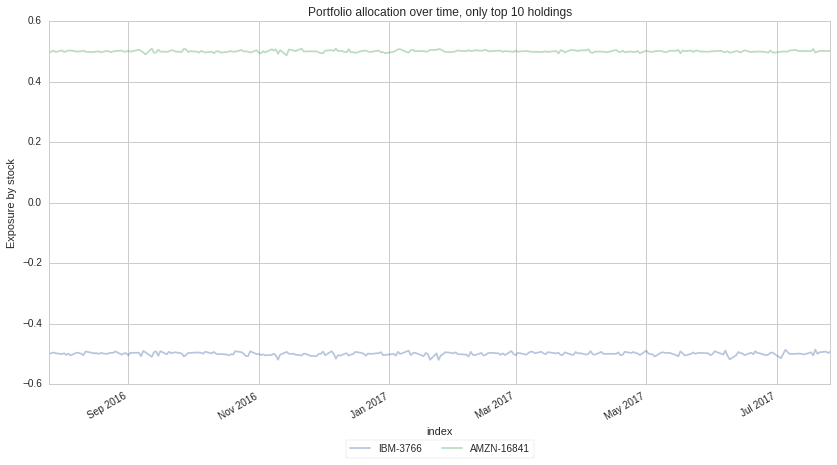

In [57]:
pos_percent = pf.pos.get_percent_alloc(bt_positions)
pf.plotting.show_and_plot_top_positions(bt_returns, pos_percent);

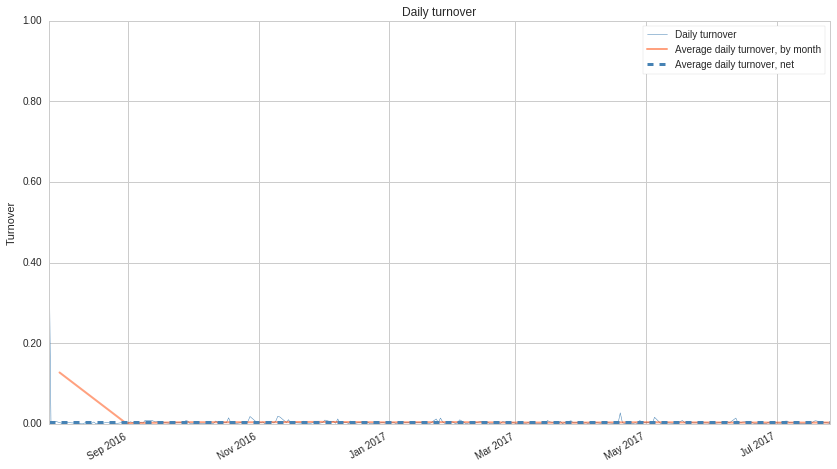

In [58]:
pf.plot_turnover(bt_returns, bt_transactions, bt_positions);

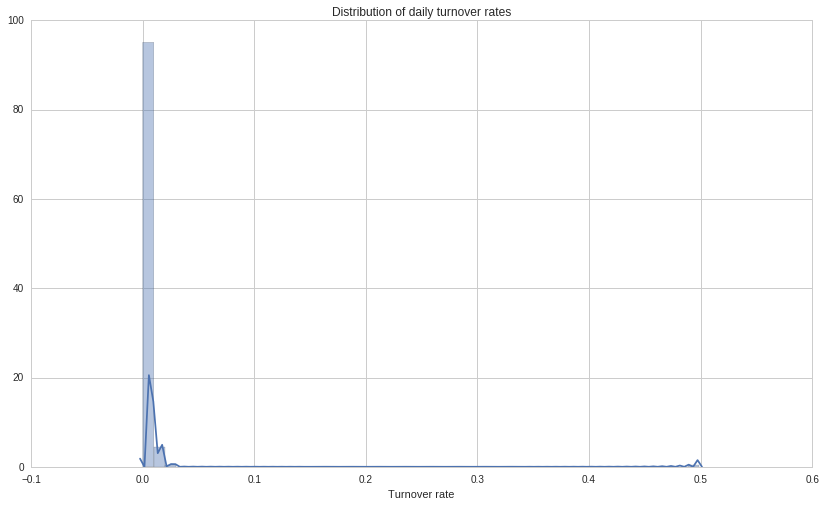

In [59]:
pf.plotting.plot_daily_turnover_hist(bt_transactions, bt_positions);

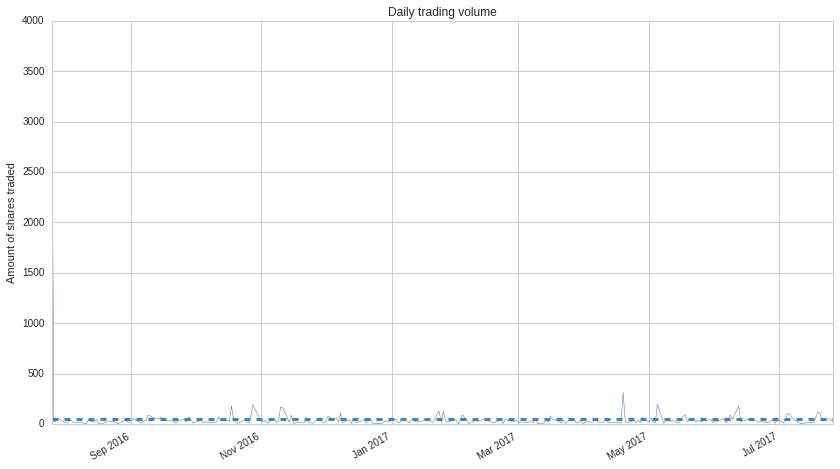

In [60]:
pf.plotting.plot_daily_volume(bt_returns, bt_transactions);

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,231.00,105.00,126.00
Percent profitable,0.81,0.59,0.99
Winning round_trips,187.00,62.00,125.00
Losing round_trips,44.00,43.00,1.00
Even round_trips,0.00,0.00,0.00


PnL stats,All trades,Short trades,Long trades
Total profit,$259314.80,$60829.40,$198485.40
Gross profit,$272619.52,$74125.78,$198493.74
Gross loss,$-13304.72,$-13296.38,$-8.34
Profit factor,$20.49,$5.57,$23797.26
Avg. trade net profit,$1122.57,$579.33,$1575.28
Avg. winning trade,$1457.86,$1195.58,$1587.95
Avg. losing trade,$-302.38,$-309.22,$-8.34
Ratio Avg. Win:Avg. Loss,$4.82,$3.87,$190.38
Largest winning trade,$151212.26,$61139.59,$151212.26
Largest losing trade,$-1626.13,$-1626.13,$-8.34


Duration stats,All trades,Short trades,Long trades
Avg duration,178 days 01:22:27.536796,174 days 20:37:58.866666,180 days 17:19:31.428571
Median duration,182 days 01:00:00,170 days 01:00:00,184 days 13:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.09%,0.05%,0.13%
Avg returns winning,0.12%,0.10%,0.13%
Avg returns losing,-0.03%,-0.03%,-0.00%
Median returns all round_trips,0.01%,0.00%,0.02%
Median returns winning,0.02%,0.01%,0.02%
Median returns losing,-0.02%,-0.02%,-0.00%
Largest winning trade,12.16%,4.92%,12.16%
Largest losing trade,-0.16%,-0.16%,-0.00%


Symbol stats,AMZN-16841,IBM-3766
Avg returns all round_trips,0.13%,0.05%
Avg returns winning,0.13%,0.10%
Avg returns losing,-0.00%,-0.03%
Median returns all round_trips,0.02%,0.00%
Median returns winning,0.02%,0.01%
Median returns losing,-0.00%,-0.02%
Largest winning trade,12.16%,4.92%
Largest losing trade,-0.00%,-0.16%


Profitability (PnL / PnL total) per name,pnl
AMZN-16841,0.77%
IBM-3766,0.23%


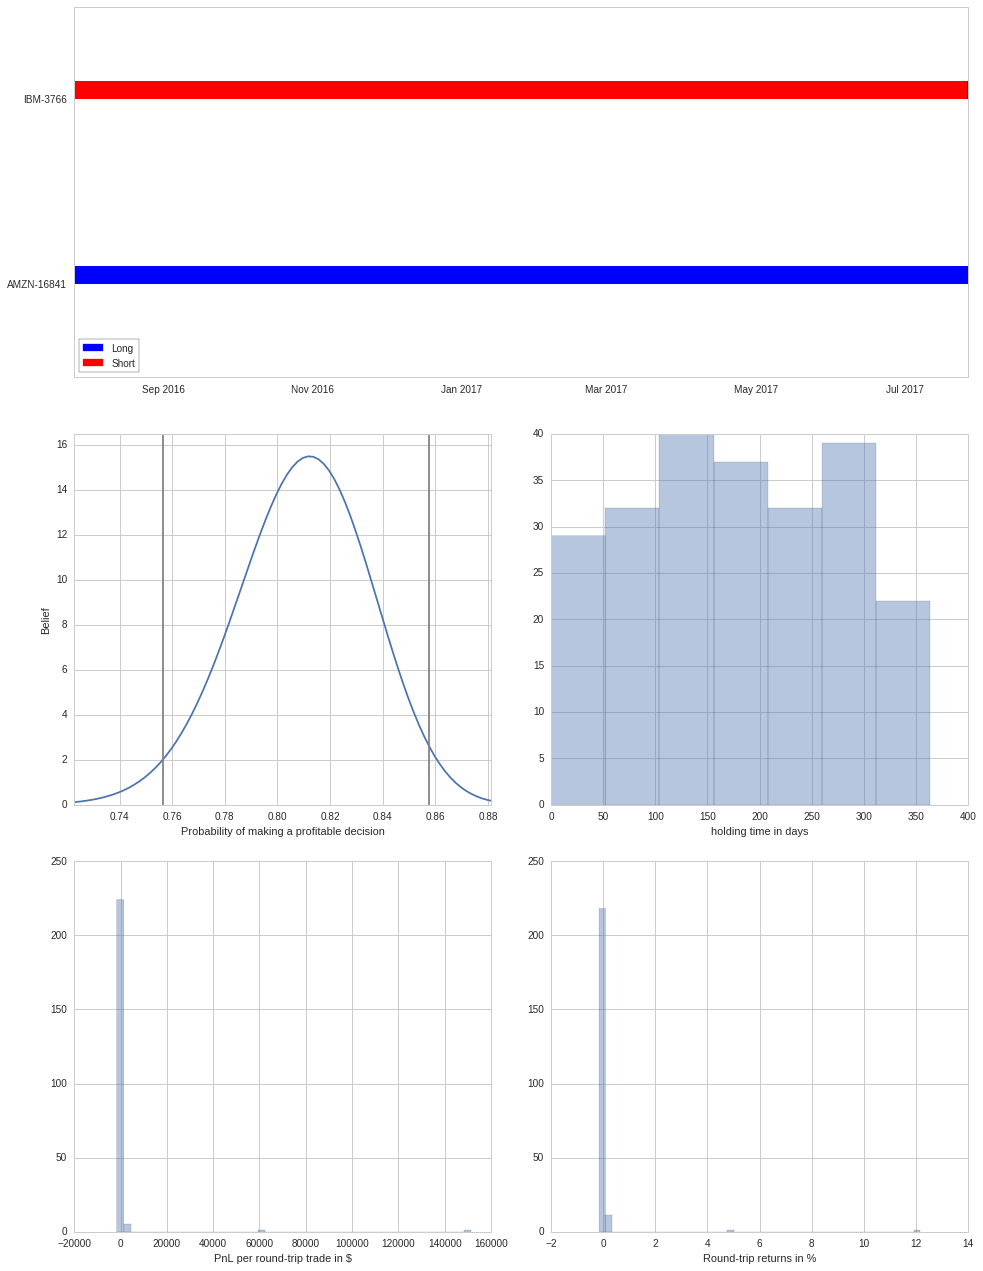

In [61]:
pf.create_round_trip_tear_sheet(bt_returns, bt_positions, bt_transactions);